In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np

In [2]:
print(plt.rcParamsDefault['figure.figsize'])

plt.rcParams = plt.rcParamsDefault

[8.0, 6.0]


In [3]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import BaggingClassifier

In [4]:
#Here I want to test some regressors

import numpy as np
import h5py
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

In [6]:
#alright now I'm going to try to apply to data

f = h5py.File('../halo_1107_Z13/halo_1107_Z13_particles.hdf5')

print(f.keys())

h = 0.675

parts = f['PartType1']
print(parts.keys())

ids = parts['ParticleIDs'][:]

#unique_mask = np.in1d(ids,np.unique(ids))

coords = parts['Coordinates'][:]/h
vel = parts['Velocities'][:]
mass= parts['Masses'][:]*1.0e10/h
stellar_mass = mass[0]*0.17
ids = parts['ParticleIDs'][:]
star_mass = parts['Stellar_Masses'][:]

host_cen = np.array([37.53820323, 34.52403051, 37.02327211])*1000.0/h
host_vel = np.array([ 57.161152, -83.112122, -17.277088])

coord_diff = np.subtract(coords,host_cen)
vel_diff = np.subtract(vel,host_vel)

dist = np.linalg.norm(coord_diff,axis=1)
dist_gal = dist[(dist<300.0)]
star_gal = np.ndarray.flatten(star_mass)[dist<300.0]

stellar_mass

<ipython-input-6-bca5ab98d8d4>:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File('../halo_1107_Z13/halo_1107_Z13_particles.hdf5')


<KeysViewHDF5 ['PartType1']>
<KeysViewHDF5 ['Coordinates', 'Masses', 'ParticleIDs', 'Stellar_Masses', 'Velocities']>
241063672 241063672 241063672


4959.9004101562505

0.001
0.0012835688421125163
0.0016475489724420657
0.0021147425268811283
0.002714417616594907
0.0034841418771425405
0.00447213595499958
0.005740294369528563
0.0073680629972807735
0.00945741609003176
0.012139244620058345
0.015581556161088883
0.020000000000000004
0.025671376842250328
0.03295097944884132
0.04229485053762257
0.05428835233189814
0.06968283754285082
0.0894427190999916
0.11480588739057127
0.1473612599456155
0.1891483218006352
0.24278489240116696
0.3116311232217777
0.4


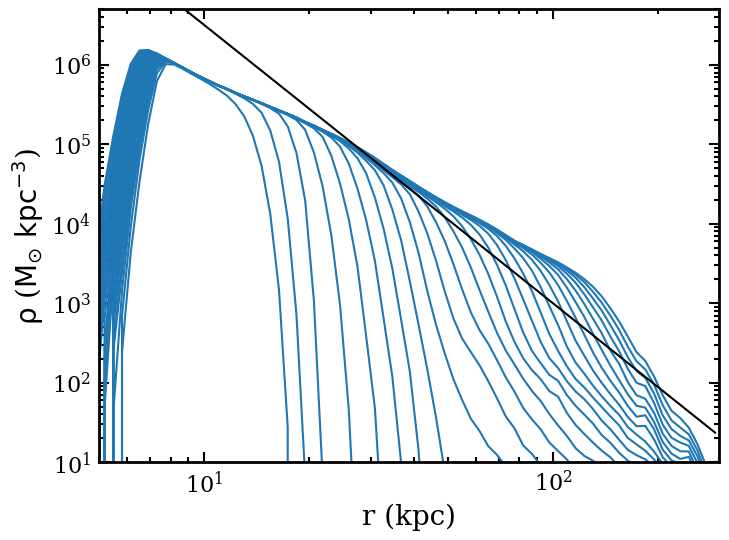

In [7]:
from scipy.optimize import curve_fit

def power_law(r,alpha,A):
    import numpy as np
    return A*np.power(r,alpha)

threshold_list = np.logspace(-3.0,np.log10(0.4),25)
for threshold in threshold_list:
    print(threshold)
    bins = np.logspace(1.0e-3,np.log10(300.0),100)
    dist_halo = dist_gal[star_gal>threshold] 

    density_profile = []

    for kk in range(len(bins)-1):
        particle_mask = (dist_halo>bins[kk])&(dist_halo<bins[kk+1])
        mass_bin = np.sum(particle_mask)*stellar_mass
        bin_size = 4.0/3.0*np.pi*(bins[kk+1]**3.0-bins[kk]**3.0)
        density_profile.append(mass_bin/bin_size)

    bins_plot = np.array([(bins[xx]+bins[xx+1])/2.0 for xx in range(len(bins)-1)])
    density_profile = np.array(density_profile)
    plt.plot(bins_plot,density_profile,color='C0')

    #fit_plot = power_law(bins_plot,*popt)
fit_test = power_law(bins_plot,-3.5,1.0e10)    
plt.plot(bins_plot,fit_test,color='k',linestyle='-')
plt.xscale('log')
plt.yscale('log')
plt.xlim([5.0,300.0])
plt.ylim([10.0,5.0e6])
plt.xlabel('r (kpc)',fontsize=20)
plt.ylabel(r'$\rm \rho$ ($\rm M_{\odot}$ $\rm kpc^{-3}$)',fontsize=20)
plt.show()

<ipython-input-9-092b44ce5bd2>:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f_reg = h5py.File('../halo_1107_Z13/predictions_from_regressor.hdf5')


<KeysViewHDF5 ['ParticleIDs', 'mass_ratio_10', 'mass_ratio_100']>


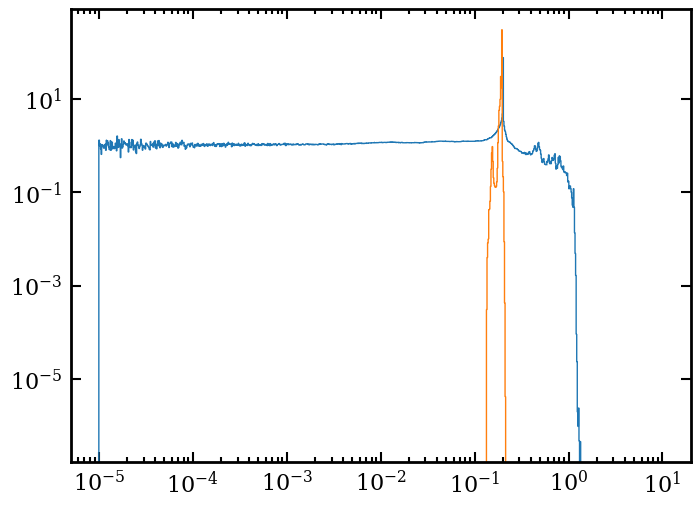

In [9]:
f_reg = h5py.File('../halo_1107_Z13/predictions_from_regressor.hdf5')
print(f_reg['PartType1'].keys())
mass_ratio_10 = f_reg['PartType1']['mass_ratio_10'][:]
mass_ratio_100 = f_reg['PartType1']['mass_ratio_100'][:]
IDs_regressor = f_reg['PartType1']['ParticleIDs'][:]

mr_10_gal = mass_r

bins_ratio = np.logspace(-5.0,1.0,1000)

#mass_ratio_dm = mass_star/mass_dm

#plt.hist(mass_ratio_dm,bins=bins_ratio,histtype='step',color='k',density='True')
plt.hist(mass_ratio_10,bins=bins_ratio,histtype='step',color='C0',density='True')
plt.hist(mass_ratio_100,bins=bins_ratio,histtype='step',color='C1',density='True')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [19]:
mr_10_gal = mass_ratio_10[dist<300]
mr_100_gal = mass_ratio_100[dist<300]

print(len(mr_10_gal),len(mr_100_gal))

27876980 27876980


0.001
0.0019458877175763882
0.003786479009414649
0.0073680629972807735
0.014337423288737734
0.027899015879248434
0.05428835233189814
0.10563903801010016
0.20556170656043912
0.4


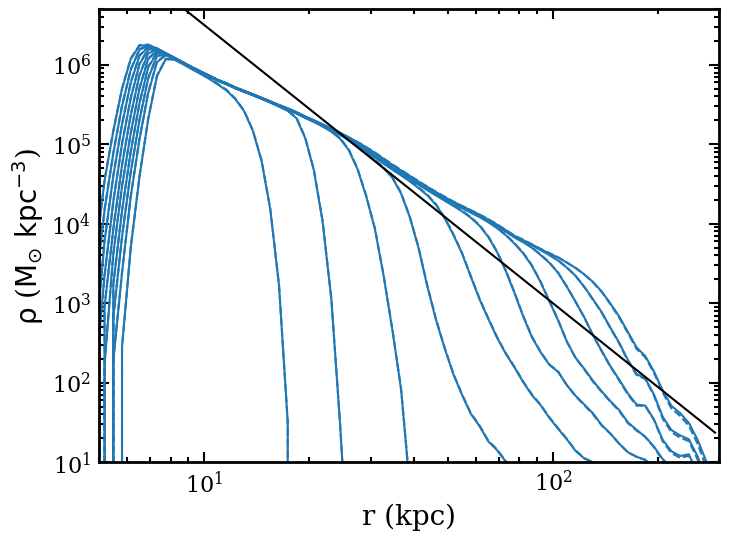

In [22]:
#now go through this and assign actual massed from the regressor

from scipy.optimize import curve_fit

def power_law(r,alpha,A):
    import numpy as np
    return A*np.power(r,alpha)

threshold_list = np.logspace(-3.0,np.log10(0.4),10)
for threshold in threshold_list:
    print(threshold)
    bins = np.logspace(1.0e-3,np.log10(300.0),100)
    dist_halo = dist_gal[star_gal>threshold] 
    mr_10_gal_thresh = mr_10_gal[star_gal>threshold]
    mr_100_gal_thresh = mr_100_gal[star_gal>threshold]
    
    density_profile_10,density_profile_100 = [],[]

    for kk in range(len(bins)-1):
        particle_mask = (dist_halo>bins[kk])&(dist_halo<bins[kk+1])
        mass_bin_10 = np.sum(mr_10_gal_thresh[particle_mask]*mass[0])
        mass_bin_100 = np.sum(mr_100_gal_thresh[particle_mask]*mass[0])
        bin_size = 4.0/3.0*np.pi*(bins[kk+1]**3.0-bins[kk]**3.0)
        density_profile_10.append(mass_bin_10/bin_size)
        density_profile_100.append(mass_bin_100/bin_size)

    bins_plot = np.array([(bins[xx]+bins[xx+1])/2.0 for xx in range(len(bins)-1)])
    density_profile = np.array(density_profile)
    plt.plot(bins_plot,density_profile_100,color='C0')
    plt.plot(bins_plot,density_profile_10,linestyle='--',color='C0')

    #fit_plot = power_law(bins_plot,*popt)
fit_test = power_law(bins_plot,-3.5,1.0e10)    
plt.plot(bins_plot,fit_test,color='k',linestyle='-')
plt.xscale('log')
plt.yscale('log')
plt.xlim([5.0,300.0])
plt.ylim([10.0,5.0e6])
plt.xlabel('r (kpc)',fontsize=20)
plt.ylabel(r'$\rm \rho$ ($\rm M_{\odot}$ $\rm kpc^{-3}$)',fontsize=20)
plt.show()

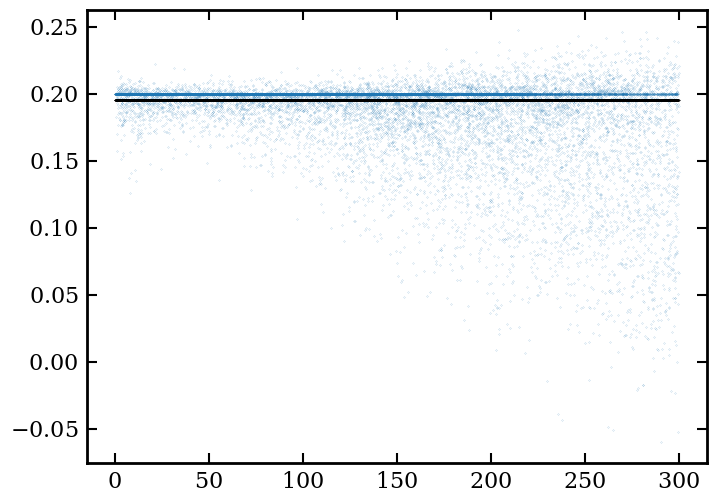

In [25]:
#mass as a function of R

plt.scatter(dist_gal[::1000],mr_10_gal[::1000],color='C0',s=0.01)
plt.scatter(dist_gal[::1000],mr_100_gal[::1000],color='k',s=0.01)
plt.show()

0.001
0.0019458877175763882
0.003786479009414649
0.0073680629972807735
0.014337423288737734
0.027899015879248434
0.05428835233189814
0.10563903801010016
0.20556170656043912
0.4


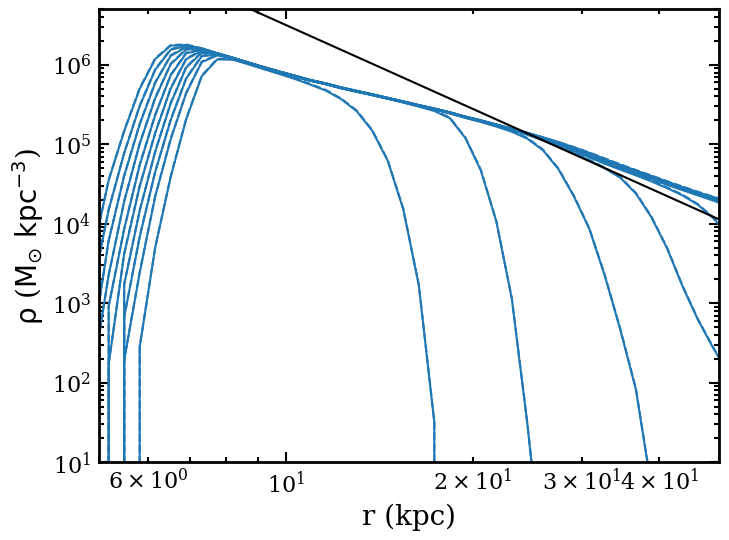

In [26]:
#now go through this and assign actual massed from the regressor

from scipy.optimize import curve_fit

def power_law(r,alpha,A):
    import numpy as np
    return A*np.power(r,alpha)

threshold_list = np.logspace(-3.0,np.log10(0.4),10)
for threshold in threshold_list:
    print(threshold)
    bins = np.logspace(1.0e-3,np.log10(300.0),100)
    dist_halo = dist_gal[star_gal>threshold] 
    mr_10_gal_thresh = mr_10_gal[star_gal>threshold]
    mr_100_gal_thresh = mr_100_gal[star_gal>threshold]
    
    density_profile_10,density_profile_100 = [],[]

    for kk in range(len(bins)-1):
        particle_mask = (dist_halo>bins[kk])&(dist_halo<bins[kk+1])
        mass_bin_10 = np.sum(mr_10_gal_thresh[particle_mask]*mass[0])
        mass_bin_100 = np.sum(mr_100_gal_thresh[particle_mask]*mass[0])
        bin_size = 4.0/3.0*np.pi*(bins[kk+1]**3.0-bins[kk]**3.0)
        density_profile_10.append(mass_bin_10/bin_size)
        density_profile_100.append(mass_bin_100/bin_size)

    bins_plot = np.array([(bins[xx]+bins[xx+1])/2.0 for xx in range(len(bins)-1)])
    density_profile = np.array(density_profile)
    plt.plot(bins_plot,density_profile_100,color='C0')
    plt.plot(bins_plot,density_profile_10,linestyle='--',color='C0')

    #fit_plot = power_law(bins_plot,*popt)
fit_test = power_law(bins_plot,-3.5,1.0e10)    
plt.plot(bins_plot,fit_test,color='k',linestyle='-')
plt.xscale('log')
plt.yscale('log')
plt.xlim([5.0,50.0])
plt.ylim([10.0,5.0e6])
plt.xlabel('r (kpc)',fontsize=20)
plt.ylabel(r'$\rm \rho$ ($\rm M_{\odot}$ $\rm kpc^{-3}$)',fontsize=20)
plt.show()